In [38]:
!pip install AdvancedAnalytics

In [39]:
from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
from AdvancedAnalytics.Tree import tree_classifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from pydotplus import graph_from_dot_data
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [40]:
import pandas as pd

# Load the dataset
df = pd.read_excel("college_admissions_2022_v3.xlsx")

# Report size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            1733 non-null   int64  
 1   INSTNM            1733 non-null   object 
 2   Public            1733 non-null   int64  
 3   Appl              1733 non-null   int64  
 4   Enroll_fall       1733 non-null   int64  
 5   Enroll_ratio      1733 non-null   float64
 6   Low_enroll_Ratio  1733 non-null   int64  
 7   Enroll_tot        1733 non-null   int64  
 8   GRTOTLT           1723 non-null   float64
 9   Tuition_in        1733 non-null   int64  
 10  Tuition_out       1733 non-null   int64  
 11  Stufacr           1733 non-null   int64  
 12  RRFTCT            1733 non-null   int64  
 13  Salary            1712 non-null   float64
 14  Ug_enter          1733 non-null   int64  
 15  Sat               1002 non-null   float64
 16  Room              1541 non-null   float64


# Drop missing values and spliting the dataset into 40 %testing

In [41]:
# Drop missing values
data_cleaned = df.dropna()

# Report size after dropping missing values
data_cleaned.info()

from sklearn.model_selection import train_test_split

# Drop specified columns
columns_to_drop = ['UNITID', 'INSTNM', 'Appl', 'Enroll_fall', 'Enroll_ratio', 'Enroll_tot']
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['Low_enroll_Ratio'])
y = data_cleaned['Low_enroll_Ratio']

# Split dataset into training set (60%) and a test set (40%) and use random_state=101.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 7 to 1689
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            949 non-null    int64  
 1   INSTNM            949 non-null    object 
 2   Public            949 non-null    int64  
 3   Appl              949 non-null    int64  
 4   Enroll_fall       949 non-null    int64  
 5   Enroll_ratio      949 non-null    float64
 6   Low_enroll_Ratio  949 non-null    int64  
 7   Enroll_tot        949 non-null    int64  
 8   GRTOTLT           949 non-null    float64
 9   Tuition_in        949 non-null    int64  
 10  Tuition_out       949 non-null    int64  
 11  Stufacr           949 non-null    int64  
 12  RRFTCT            949 non-null    int64  
 13  Salary            949 non-null    float64
 14  Ug_enter          949 non-null    int64  
 15  Sat               949 non-null    float64
 16  Room              949 non-null    float64
 17  B

# Decision Tree

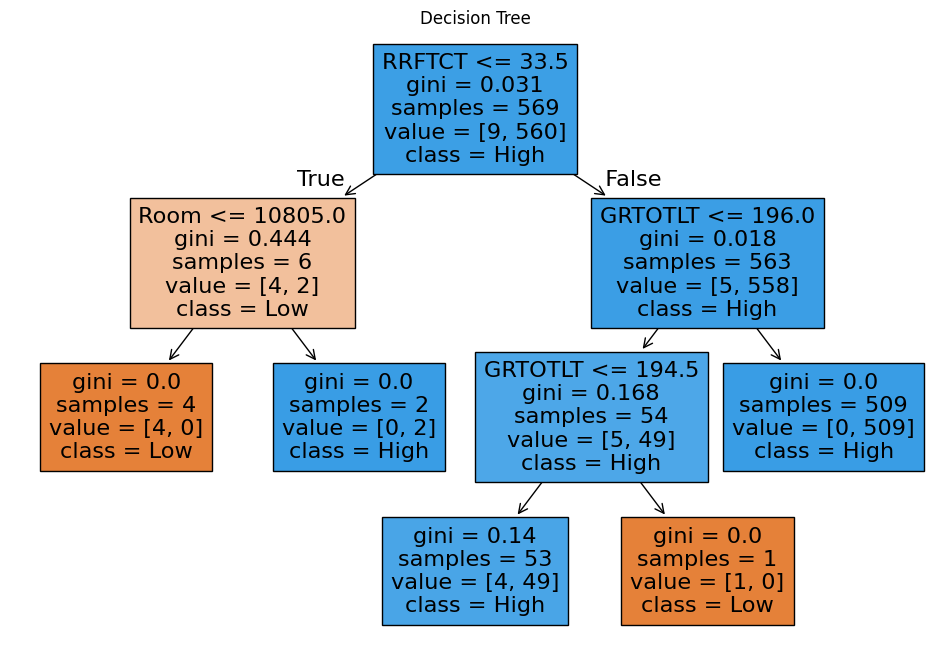

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.99      0.99      0.99       374

    accuracy                           0.98       380
   macro avg       0.62      0.58      0.59       380
weighted avg       0.98      0.98      0.98       380



In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Fit Decision Tree
DecisionTree_model = DecisionTreeClassifier(max_depth=3, random_state=1)
DecisionTree_model.fit(X_train, y_train)

# Visualize the Decision Tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(DecisionTree_model, filled=True, feature_names=X.columns, class_names=['Low', 'High'])
plt.title("Decision Tree")
plt.show()

# Classification report
y_pred_DecisionTree = DecisionTree_model.predict(X_test)
print(classification_report(y_test, y_pred_DecisionTree))


# Random Forest

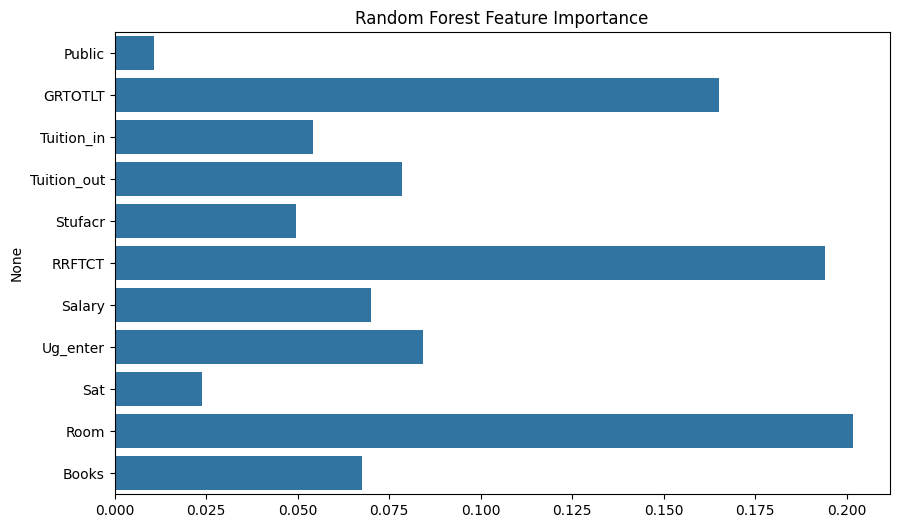

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.99      1.00      0.99       374

    accuracy                           0.98       380
   macro avg       0.74      0.58      0.62       380
weighted avg       0.98      0.98      0.98       380



In [43]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Fit Random Forest
RandomForest_model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=1)
RandomForest_model.fit(X_train, y_train)

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=RandomForest_model.feature_importances_, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.show()

# Classification report
y_pred_RandomForest = RandomForest_model.predict(X_test)
print(classification_report(y_test, y_pred_RandomForest))


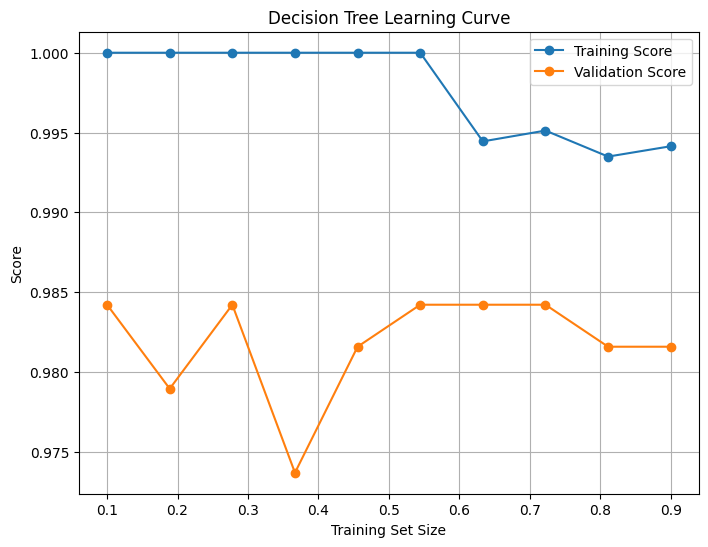

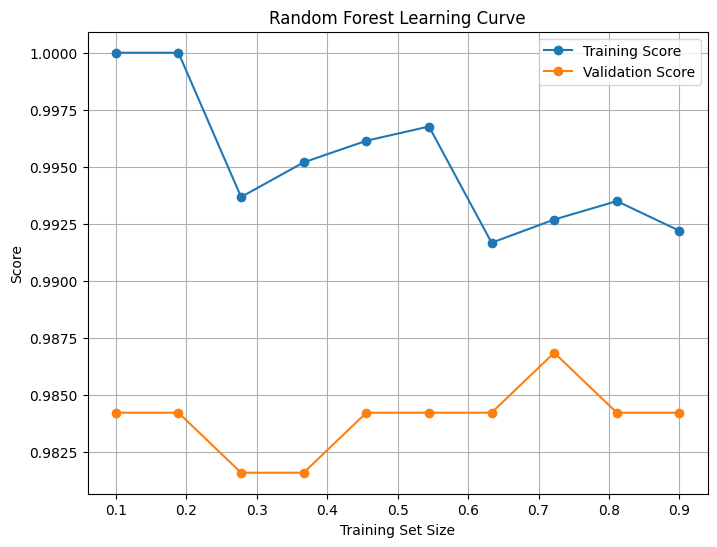

In [44]:
import numpy as np

def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    train_sizes = np.linspace(0.1, 0.9, 10)
    train_scores = []
    test_scores = []

    for size in train_sizes:
        X_partial, _, y_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=101)
        model.fit(X_partial, y_partial)
        train_scores.append(model.score(X_partial, y_partial))
        test_scores.append(model.score(X_test, y_test))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, label="Training Score", marker='o')
    plt.plot(train_sizes, test_scores, label="Validation Score", marker='o')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(DecisionTree_model, X_train, y_train, X_test, y_test, "Decision Tree Learning Curve")
plot_learning_curve(RandomForest_model, X_train, y_train, X_test, y_test, "Random Forest Learning Curve")
